In [ ]:
import numpy as np 
import pandas as pd 
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DATA_PATH = "./drive/MyDrive/Workshop/"

In [ ]:
https://drive.google.com/drive/folders/1On24Y7rDmIkUJySj4_YmlioNfr49F5_e?usp=sharing

# ETL Pipelines Tutorial

The data comes from two sources:

[World Bank Indicator Data](https://data.worldbank.org/indicator) - This data contains socio-economic indicators for countries around the world. A few example indicators include population, arable land, and central government debt. <br />

[World Bank Project Data](https://datacatalog.worldbank.org/dataset/world-bank-projects-operations) - This data set contains information about World Bank project lending since 1947.


In [ ]:
%cd ./drive/MyDrive/Workshop
%ls

/content/drive/MyDrive/Afeka/Business Intelligence/Practice/Workshop
 electricity_access_percent.csv   population_data.db
'ETL Piplines.ipynb'              population_data.xml
 gdp_data.csv                     projects_data.csv
 mystery.csv                      rural_population_percent.csv
 population_data.csv              worldbank.db


# Extract

##  Extracting data from a csv file

In [ ]:
df_projects = pd.read_csv('projects_data.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (44) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


We got a dtype warning, Read about what this warning is in the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.errors.DtypeWarning.html).

Pandas tries to figure out programatically the data type of each column (integer, float, boolean, string). In this case, pandas could not automatically figure out the data type. That is because some columns have more than one possible data types. In other words, this data is messy.

You can use the dtype option to specify the data type of each column. Because there are so many columns in this data set, you can set all columns to be strings at least for now.


In [ ]:
df_projects = pd.read_csv('projects_data.csv',dtype='str')
df_projects.head()

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,mjtheme3name,mjtheme4name,mjtheme5name,location,GeoLocID,GeoLocName,Latitude,Longitude,Country,Unnamed: 56
0,P162228,Other,World;World,RE,Investment Project Financing,IN,C,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P163962,Africa,Democratic Republic of the Congo;Democratic Re...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P167672,South Asia,People's Republic of Bangladesh;People's Repub...,PE,Investment Project Financing,IN,NaN,Y,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P158768,South Asia,Islamic Republic of Afghanistan;Islamic Repu...,PE,Investment Project Financing,IN,A,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P161364,Africa,Federal Republic of Nigeria;Federal Republic o...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,0002327546!$!Ogun State!$!7!$!3.58333!$!NG;000...,0002327546;0002328925;0002565340;0002565343;00...,Ogun State;Niger State;Abia State;Edo;Kebbi St...,7;10;5.41667;6.5;11.5;8,3.58333;6;7.5;6;4;10.5,NG;NG;NG;NG;NG;NG,NaN


count the number of null values in the data set

In [ ]:
df_projects.shape

(18248, 57)

In [ ]:
df_projects.isnull().sum()

id                              0
regionname                      0
countryname                     0
prodline                        0
lendinginstr                  246
lendinginstrtype              246
envassesmentcategorycode     5811
supplementprojectflg           53
productlinetype                 0
projectstatusdisplay            4
status                          4
project_name                    0
boardapprovaldate            1504
board_approval_month         1504
closingdate                  3349
lendprojectcost               125
ibrdcommamt                     0
idacommamt                      0
totalamt                        0
grantamt                        0
borrower                     5919
impagency                    6097
url                             0
projectdoc                  18248
majorsector_percent         18248
sector1                         0
sector2                      8721
sector3                     11761
sector4                     13872
sector5       

Notice that the number 18248 shows up multiple times. There is also a countryname column with 0 missing values and a Country column with 14045 missing values. This data set clearly has some issues that will need to be solved in the transform part of the pipeline.

Next, output the shape of the data frame

In [ ]:
df_projects.shape

(18248, 57)

Next, use the pandas read_csv method to read in the population_data.csv file. When you try to read in this data set using pandas, you'll get an error because there is something wrong with the data.

In [ ]:
df_population = pd.read_csv('population_data.csv')

ParserError: ignored

What might have happened? Try printing out the first few lines of the data file to see what the issue might be.

In [ ]:
f = open("population_data.csv")
for i in range(10):
    line = f.readline()
    print('line: ', i, line)
f.close()

line:  0 ﻿"Data Source","World Development Indicators",

line:  1 

line:  2 "Last Updated Date","2018-06-28",

line:  3 

line:  4 "Country Name","Country Code","Indicator Name","Indicator Code","1960","1961","1962","1963","1964","1965","1966","1967","1968","1969","1970","1971","1972","1973","1974","1975","1976","1977","1978","1979","1980","1981","1982","1983","1984","1985","1986","1987","1988","1989","1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017",

line:  5 "Aruba","ABW","Population, total","SP.POP.TOTL","54211","55438","56225","56695","57032","57360","57715","58055","58386","58726","59063","59440","59840","60243","60528","60657","60586","60366","60103","59980","60096","60567","61345","62201","62836","63026","62644","61833","61079","61032","62149","64622","68235","72504","76700","80324","83200","85451","87277","89005","90853","92898","94

The first four lines in the file are not properly formatted and don't contain data. Read in population data skipping first four rows:

In [ ]:
df_population = pd.read_csv('population_data.csv', skiprows=4)

In [ ]:
df_population.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0,NaN


In [ ]:
df_population.shape

(264, 63)

In [ ]:
df_population.isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960                4
                 ... 
2014                2
2015                2
2016                2
2017                2
Unnamed: 62       264
Length: 63, dtype: int64

It looks like every year column has at least one NaN value. 

And it looks like almost every row has only one null value. That is probably from the 'Unnamed: 62' column that doesn't have any relevant information in it. Drop the 'Unnamed: 62' column from the data frame.

In [ ]:
df_population = df_population.drop('Unnamed: 62', axis=1)

In [ ]:
df_population[df_population.isnull().any(axis=1)]

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
67,Eritrea,ERI,"Population, total",SP.POP.TOTL,1397491.0,1432640.0,1469645.0,1508273.0,1548187.0,1589179.0,...,4232636.0,4310334.0,4390840.0,4474690.0,NaN,NaN,NaN,NaN,NaN,NaN
108,Not classified,INX,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,Kuwait,KWT,"Population, total",SP.POP.TOTL,269618.0,301336.0,338296.0,379891.0,425235.0,473554.0,...,2652340.0,2818939.0,2998083.0,3191051.0,3395556.0,3598385.0,3782450.0,3935794.0,4052584.0,4136528.0
194,West Bank and Gaza,PSE,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,3596688.0,3702218.0,3811102.0,3927051.0,4046901.0,4169506.0,4294682.0,4422143.0,4551566.0,4684777.0
212,Serbia,SRB,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,7350222.0,7320807.0,7291436.0,7234099.0,7199077.0,7164132.0,7130576.0,7095383.0,7058322.0,7022268.0
223,Sint Maarten (Dutch part),SXM,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,33964.0,34238.0,34056.0,33435.0,34640.0,36607.0,37685.0,38824.0,39969.0,41109.0


## Extract from  XML

I'll extract the same population data, except the data will be in a different format.

Both JSON and XML are common formats for storing data. XML was established before JSON, and JSON has become more popular over time. They both tend to be used for sending data via web APIs, which I'll learn about later in the lesson.

Sometimes, you can obtain the same data in either JSON or XML format. The World Bank indicator data is available in either form

First, you'll practice extracting data from a JSON file.

In [ ]:
def print_lines(n, file_name):
    f = open(file_name)
    for i in range(n):
        print(f.readline())
    f.close()

In [ ]:
print_lines(15, 'population_data.xml')

﻿<?xml version="1.0" encoding="utf-8"?>

<Root xmlns:wb="http://www.worldbank.org">

  <data>

    <record>

      <field name="Country or Area" key="ABW">Aruba</field>

      <field name="Item" key="SP.POP.TOTL">Population, total</field>

      <field name="Year">1960</field>

      <field name="Value">54211</field>

    </record>

    <record>

      <field name="Country or Area" key="ABW">Aruba</field>

      <field name="Item" key="SP.POP.TOTL">Population, total</field>

      <field name="Year">1961</field>

      <field name="Value">55438</field>

    </record>



XML looks very similar to HTML. XML is formatted with tags having values inside the tags. XML is not as easy to navigate as JSON. Pandas cannot read in XML directly. One reason is that tag names are user defined. Every XML file might have different formatting. You can imagine why XML has fallen out of favor relative to JSON.

### How to read and navigate XML

There is a Python library called BeautifulSoup, which makes reading in and parsing XML data easier. Here is the link to the documentation: [Beautiful Soup Documentation](https://www.crummy.com/software/BeautifulSoup/)

The find() method will find the first place where an xml element occurs. For example using find('record') will return the first record in the xml file:

```xml
<record>
  <field name="Country or Area" key="ABW">Aruba</field>
  <field name="Item" key="SP.POP.TOTL">Population, total</field>
  <field name="Year">1960</field>
  <field name="Value">54211</field>
</record>
```

The find_all() method returns all of the matching tags. So find_all('record') would return all of the elements with the `<record>` tag.


In [ ]:
!pip install bs4

In [ ]:
# import the BeautifulSoup library
from bs4 import BeautifulSoup

# open the population_data.xml file and load into Beautiful Soup
with open("population_data.xml") as fp:
    soup = BeautifulSoup(fp,"lxml") #lxml is the parser type

In [ ]:
# output the first 5 records in the xml file
# this is an example of how to navigate the XML document with BeautifulSoup

i = 0
# use the find_all method to get all record tags in the document
for record in soup.find_all('record'):
    # use the find_all method to get all fields in each record
    i += 1
    for record in record.find_all('field'):
        print(record['name'], ': ' , record.text)
    print()
    if i == 5:
        break

Country or Area :  Aruba
Item :  Population, total
Year :  1960
Value :  54211

Country or Area :  Aruba
Item :  Population, total
Year :  1961
Value :  55438

Country or Area :  Aruba
Item :  Population, total
Year :  1962
Value :  56225

Country or Area :  Aruba
Item :  Population, total
Year :  1963
Value :  56695

Country or Area :  Aruba
Item :  Population, total
Year :  1964
Value :  57032



## Extract Data from SQL Databases

### Pandas and sqlite3

You can use Pandas to open a SQL database or to run a SQL query against a database. There is more than one way to do this depending on the type of SQL database you are working with: the [sqlite3 library](https://www.sqlite.org/about.html) or the [sqlalchemy library](https://www.sqlalchemy.org/).


In [ ]:
import sqlite3

#connection to the database 
conn = sqlite3.connect('population_data.db')

#run a query
data = pd.read_sql('SELECT * FROM population_data', conn)
data.head()

,index,Country_Name,Country_Code,Indicator_Name,Indicator_Code,1960,1961,1962,1963,1964,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0


In [ ]:
data[["Country_Name", "Country_Code"]]

,Country_Name,Country_Code
0,Aruba,ABW
1,Afghanistan,AFG
2,Angola,AGO
3,Albania,ALB
4,Andorra,AND
...,...,...
259,Kosovo,XKX
260,"Yemen, Rep.",YEM
261,South Africa,ZAF
262,Zambia,ZMB


In [ ]:
pd.read_sql('SELECT "Country_Name", "Country_Code", "1960" FROM population_data', conn)

,Country_Name,Country_Code,1960
0,Aruba,ABW,54211.0
1,Afghanistan,AFG,8996351.0
2,Angola,AGO,5643182.0
3,Albania,ALB,1608800.0
4,Andorra,AND,13411.0
...,...,...,...
259,Kosovo,XKX,947000.0
260,"Yemen, Rep.",YEM,5172135.0
261,South Africa,ZAF,17456855.0
262,Zambia,ZMB,3044846.0


### SQLAlchemy and Pandas

If you are working with a different type of database such as MySQL or PostgreSQL, you can use the SQLAlchemy library with pandas. Here are the instructions for connecting to [different types of databases using SQLAlchemy](http://docs.sqlalchemy.org/en/latest/core/engines.html).


In [ ]:
from sqlalchemy import create_engine

### 
# create a database engine 
# to find the correct file path, use the python os library:
# import os
# print(os.getcwd())
#
###

# engine = create_engine('sqlite:////home/workspace/3_sql_exercise/population_data.db')
# pd.read_sql("SELECT * FROM population_data", engine)

# Transform

## Combining Data

There are two csv files:
* rural_population_percent.csv
* electricity_access_percent.csv


In [ ]:
f = open("rural_population_percent.csv")
for i in range(10):
    line = f.readline()
    print('line: ', i, line)
f.close()

FileNotFoundError: ignored

In [ ]:
df_rural = pd.read_csv('rural_population_percent.csv',skiprows=4)
df_rural.head()

In [ ]:
f = open("electricity_access_percent.csv")
for i in range(10):
    line = f.readline()
    print('line: ', i, line)
f.close()

In [ ]:
df_electricity = pd.read_csv('electricity_access_percent.csv',skiprows=4)
df_electricity.head()

In [ ]:
df_rural.columns

remove the `Unnamed:62` column from each data set

In [ ]:
df_electricity.columns

In [ ]:
df_rural.drop(['Unnamed: 62'],axis=1)

In [ ]:
df_electricity.drop(['Unnamed: 62'],axis=1,inplace=True)

In [ ]:
df_rural.columns

In [ ]:
df_electricity.columns

In [ ]:
df_rural.head()

In [ ]:
df = pd.concat([df_rural, df_electricity])

In [ ]:
df.head()

## Cleaning Data



In [ ]:
df_indicator = pd.read_csv('population_data.csv', skiprows=4)
df_indicator.drop(['Unnamed: 62'], axis=1, inplace=True)

# read in the projects data set with all columns type string
df_projects = pd.read_csv('projects_data.csv', dtype=str)
df_projects.drop(['Unnamed: 56'], axis=1, inplace=True)

The next code cell outputs the unique country names and ISO abbreviations in the population indicator data set. You'll notice a few values that represent world regions such as 'East Asia & Pacific' and 'East Asia & Pacific (excluding high income)'.

In [ ]:
df_indicator[['Country Name', 'Country Code']].drop_duplicates()

,Country Name,Country Code
0,Aruba,ABW
1,Afghanistan,AFG
2,Angola,AGO
3,Albania,ALB
4,Andorra,AND
...,...,...
259,Kosovo,XKX
260,"Yemen, Rep.",YEM
261,South Africa,ZAF
262,Zambia,ZMB


In [ ]:
df_projects['countryname'].unique()

array(['World;World',
       'Democratic Republic of the Congo;Democratic Republic of the Congo',
       "People's Republic of Bangladesh;People's Republic of Bangladesh",
       'Islamic  Republic of Afghanistan;Islamic  Republic of Afghanistan',
       'Federal Republic of Nigeria;Federal Republic of Nigeria',
       'Republic of Tunisia;Republic of Tunisia',
       'Lebanese Republic;Lebanese Republic',
       'Democratic Socialist Republic of Sri Lan;Democratic Socialist Republic of Sri Lan',
       'Nepal;Nepal', 'Kyrgyz Republic;Kyrgyz Republic',
       'Hashemite Kingdom of Jordan;Hashemite Kingdom of Jordan',
       'Republic of the Union of Myanmar;Republic of the Union of Myanmar',
       'Arab Republic of Egypt;Arab Republic of Egypt',
       'United Republic of Tanzania;United Republic of Tanzania',
       'Federal Democratic Republic of Ethiopia;Federal Democratic Republic of Ethiopia',
       'Burkina Faso;Burkina Faso',
       'Republic of Uzbekistan;Republic of Uzbekist

Did you notice a pattern in the projects data country names? The entries are repeated and separated by a semi-colon like this:
```text
'Kingdom of Spain;Kingdom of Spain'
'New Zealand;New Zealand'
```

The first step is to clean the country name column and get rid of the semi-colon.

In [ ]:
df_projects['Official Country Name'] = df_projects['countryname'].str.split(';').str.get(0)
df_projects.head()

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,mjtheme3name,mjtheme4name,mjtheme5name,location,GeoLocID,GeoLocName,Latitude,Longitude,Country,Official Country Name
0,P162228,Other,World;World,RE,Investment Project Financing,IN,C,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,World
1,P163962,Africa,Democratic Republic of the Congo;Democratic Re...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Democratic Republic of the Congo
2,P167672,South Asia,People's Republic of Bangladesh;People's Repub...,PE,Investment Project Financing,IN,NaN,Y,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,People's Republic of Bangladesh
3,P158768,South Asia,Islamic Republic of Afghanistan;Islamic Repu...,PE,Investment Project Financing,IN,A,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Islamic Republic of Afghanistan
4,P161364,Africa,Federal Republic of Nigeria;Federal Republic o...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,0002327546!$!Ogun State!$!7!$!3.58333!$!NG;000...,0002327546;0002328925;0002565340;0002565343;00...,Ogun State;Niger State;Abia State;Edo;Kebbi St...,7;10;5.41667;6.5;11.5;8,3.58333;6;7.5;6;4;10.5,NG;NG;NG;NG;NG;NG,Federal Republic of Nigeria


In [ ]:
# install and import the pycountry library
!pip install pycountry
from pycountry import countries

     |████████████████████████████████| 10.1 MB 5.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=71eb1967c3af49a956dfca348cb9c3836855eefe4de4f6ed63b8aae785d62a33
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built pycountry


In [ ]:
# Run this code cell to see an example of how the library works
countries.get(name='Spain')

Country(alpha_2='ES', alpha_3='ESP', flag='🇪🇸', name='Spain', numeric='724', official_name='Kingdom of Spain')

In [ ]:
# Run this code cell to see how you can also look up countries without specifying the key
countries.lookup('Kingdom of Spain')

The goal is to add the ISO codes to the projects data set. To start, use the pycountry library to make a dictionary mapping the unique countries in 'Official Country Name' to the ISO code.

Iterate through the unique countries in df_projects['Official Country Name']. Create a dictionary mapping the 'Country Name' to the alpha_3 ISO abbreviations. 

The dictionary should look like:
`{'Kingdom of Spain':'ESP'}`

If a country name cannot be found in the pycountry library, add it to a list called `country_not_found`.

In [ ]:
# set up the libraries and variables
from collections import defaultdict
country_not_found = [] # stores countries not found in the pycountry library
project_country_abbrev_dict = defaultdict(str) # set up an empty dictionary of string values

# iterate through the country names in df_projects. 
# Create a dictionary mapping the country name to the alpha_3 ISO code
for country in df_projects['Official Country Name'].drop_duplicates().sort_values():
    try: 
        # look up the country name in the pycountry library
        # store the country name as the dictionary key and the ISO-3 code as the value
        project_country_abbrev_dict[country] = countries.lookup(country).alpha_3
    except:
        # If the country name is not in the pycountry library, then print out the country name
        # And store the results in the country_not_found list
        print(country, ' not found')
        country_not_found.append(country)

Africa  not found
American Samoa  not found
Andean Countries  not found
Antigua and Barbuda  not found
Arab Republic of Egypt  not found
Aral Sea  not found
Argentine Republic  not found
Asia  not found
Barbados  not found
Belize  not found
Bosnia and Herzegovina  not found
Burkina Faso  not found
Caribbean  not found
Caucasus  not found
Central Africa  not found
Central African Republic  not found
Central America  not found
Central Asia  not found
Co-operative Republic of Guyana  not found
Commonwealth of Australia  not found
Commonwealth of Dominica  not found
Commonwealth of The Bahamas  not found
Czech Republic  not found
Democratic Republic of Sao Tome and Prin  not found
Democratic Republic of Timor-Leste  not found
Democratic Republic of the Congo  not found
Democratic Socialist Republic of Sri Lan  not found
Dominican Republic  not found
EU Accession Countries  not found
East Asia and Pacific  not found
Eastern Africa  not found
Europe and Central Asia  not found
Federal Democr

Quite a few country names were not in the pycountry library. Some of these are regions like "South Asia" or "Southern Africa", so it makes sense that these would not show up in the pycountry library.

Part 3 - Making a Manual Mapping

Perhaps some of these missing df_projects countries are already in the indicators data set. In the next cell, check if any of the countries in the country_not_found list are in the indicator list of countries.

In [ ]:
# Run this cell to iterate through the country_not_found list and check if the country name is in the df_indicator data set
indicator_countries = df_indicator[['Country Name', 'Country Code']].drop_duplicates().sort_values(by='Country Name')

for country in country_not_found:
    if country in indicator_countries['Country Name'].tolist():
        print(country)

Unfortunately, there aren't too many country names that match between df_indicator and df_projects. This is where data cleaning becomes especially tedious, but in this case, we've done a lot of the work for you.

We've manually created a dictionary that maps all of the countries in country_not_found to the ISO-3 alpha codes. You **could** try to do this programatically using some sophisticated string matching rules. That might be worth your time for a larger data set. But in this case, it's probably faster to type out the dictionary.

In [ ]:
country_not_found_mapping = {'Co-operative Republic of Guyana': 'GUY',
             'Commonwealth of Australia':'AUS',
             'Democratic Republic of Sao Tome and Prin':'STP',
             'Democratic Republic of the Congo':'COD',
             'Democratic Socialist Republic of Sri Lan':'LKA',
             'East Asia and Pacific':'EAS',
             'Europe and Central Asia': 'ECS',
             'Islamic  Republic of Afghanistan':'AFG',
             'Latin America':'LCN',
              'Caribbean':'LCN',
             'Macedonia':'MKD',
             'Middle East and North Africa':'MEA',
             'Oriental Republic of Uruguay':'URY',
             'Republic of Congo':'COG',
             "Republic of Cote d'Ivoire":'CIV',
             'Republic of Korea':'KOR',
             'Republic of Niger':'NER',
             'Republic of Kosovo':'XKX',
             'Republic of Rwanda':'RWA',
              'Republic of The Gambia':'GMB',
              'Republic of Togo':'TGO',
              'Republic of the Union of Myanmar':'MMR',
              'Republica Bolivariana de Venezuela':'VEN',
              'Sint Maarten':'SXM',
              "Socialist People's Libyan Arab Jamahiriy":'LBY',
              'Socialist Republic of Vietnam':'VNM',
              'Somali Democratic Republic':'SOM',
              'South Asia':'SAS',
              'St. Kitts and Nevis':'KNA',
              'St. Lucia':'LCA',
              'St. Vincent and the Grenadines':'VCT',
              'State of Eritrea':'ERI',
              'The Independent State of Papua New Guine':'PNG',
              'West Bank and Gaza':'PSE',
              'World':'WLD'}

Next, update the project_country_abbrev_dict variable with these new values.

In [ ]:
# Update the project_country_abbrev_dict with the country_not_found_mapping dictionary
# HINT: This is relatively straightforward. Python dictionaries have a method called update(), which essentially
# appends a dictionary to another dictionary

project_country_abbrev_dict.update(country_not_found_mapping)

Part 5 - Make a 'Country Code' Column

Next, create a 'Country Code' column in the data_projects data frame. Use the project_country_abbrev_dict and df_projects['Country Name'] column to create a new columns called 'Country 'Code'.

In [ ]:
df_projects['Country Code'] = df_projects['Official Country Name'].apply(lambda x: project_country_abbrev_dict[x])

In [ ]:
df_projects[df_projects['Country Code'] == '']

Now the df_projects dataframe and the df_indicator dataframe have a matching column called 'Country Code'. But these two data frames can't be merged quite yet. 

Each project in the df_projects dataframe also has a date associated with it. The idea would be to merge the df_projects dataframe with the df_indicator dataframe so that each project also had a population value associated with it. There are still more data transformations to do in order for that to be possible. 

## Data Types


In [ ]:
import pandas as pd

# read in the population data and drop the final column
df_indicator = pd.read_csv('population_data.csv', skiprows=4)
df_indicator.drop(['Unnamed: 62'], axis=1, inplace=True)

# read in the projects data set with all columns type string
df_projects = pd.read_csv('projects_data.csv', dtype=str)
df_projects.drop(['Unnamed: 56'], axis=1, inplace=True)

In [ ]:
df_indicator.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2013              float64
2014              float64
2015              float64
2016              float64
2017              float64
Length: 62, dtype: object

These results look reasonable. Country Name, Country Code, Indicator Name and Indicator Code were all read in as strings. The year columns, which contain the population data, were read in as floats.

Since the population indicator data was read in correctly, you can run calculations on the data. In this first exercise, sum the populations of the United States, Canada, and Mexico by year.

In [ ]:
# Calculate the population sum by year for Canada,
#       the United States, and Mexico.

# the keepcol variable makes a list of the column names to keep. You can use this if you'd like
keepcol = ['Country Name']
for i in range(1960, 2018):
    keepcol.append(str(i))

# In the df_nafta variable, store a data frame that only contains the rows for 
#      Canada, United States, and Mexico.
df_nafta = df_indicator[(df_indicator['Country Name'] == 'Canada') | 
             (df_indicator['Country Name'] == 'United States') | 
            (df_indicator['Country Name'] == 'Mexico')].iloc[:,]


# Calculate the sum of the values in each column in order to find the total population by year.
# You can use the keepcol variable if you want to control which columns get outputted
df_nafta.sum(axis=0)[keepcol]

Country Name    CanadaMexicoUnited States
1960                          236754121.0
1961                          241356126.0
1962                          245801588.0
1963                          250145880.0
1964                          254478272.0
1965                          258604043.0
1966                          262619038.0
1967                          266553812.0
1968                          270344019.0
1969                          274128481.0
1970                          278405861.0
1971                          283025259.0
1972                          287367782.0
1973                          291558995.0
1974                          295716280.0
1975                          300054399.0
1976                          304176763.0
1977                          308380884.0
1978                          312660488.0
1979                          317041689.0
1980                          321178871.0
1981                          325358195.0
1982                          3294

In [ ]:
df_projects.dtypes

id                          object
regionname                  object
countryname                 object
prodline                    object
lendinginstr                object
lendinginstrtype            object
envassesmentcategorycode    object
supplementprojectflg        object
productlinetype             object
projectstatusdisplay        object
status                      object
project_name                object
boardapprovaldate           object
board_approval_month        object
closingdate                 object
lendprojectcost             object
ibrdcommamt                 object
idacommamt                  object
totalamt                    object
grantamt                    object
borrower                    object
impagency                   object
url                         object
projectdoc                  object
majorsector_percent         object
sector1                     object
sector2                     object
sector3                     object
sector4             

In [ ]:
df_projects[['totalamt', 'lendprojectcost']].head()

,totalamt,lendprojectcost
0,0,"500,000"
1,"200,000,000","200,000,000"
2,"58,330,000","50,000,000"
3,"20,000,000","50,000,000"
4,"100,000,000","100,000,000"


In [ ]:
df_projects['totalamt'].sum()

'0200,000,00058,330,00020,000,000100,000,000500,000,000350,000,000225,000,000125,000,000329,900,000200,000,000400,000,0000150,000,0000389,000,0000530,000,000350,000,000202,000,000300,000,000500,000,000493,060,000175,000,0000230,000,00080,000,000400,000,000130,000,00030,000,00035,000,0000250,000,000200,000,000400,000,000110,000,000150,000,00074,000,000118,000,000465,000,000050,000,00090,000,000100,000,000130,000,00010,000,000460,600,000100,000,000700,000,00030,000,000280,000,00040,000,000300,000,00090,000,000150,000,000150,000,00043,000,000100,000,00015,000,00015,000,000012,000,00030,000,000100,000,000250,000,000200,000,000150,000,00025,000,000500,000,000122,100,00020,000,00007,390,000000050,000,00075,000,00060,000,00025,000,00015,000,00000300,000,00025,000,00011,000,0009,000,000130,000,000140,000,000100,000,000200,000,00070,000,000140,000,00020,000,000188,000,000200,000,000500,000,00014,200,00040,000,000150,000,000003,550,000600,000,000400,000,0000150,000,0006,000,00012,000,000100,000,

In [ ]:
df_projects['totalamt'] = pd.to_numeric(df_projects['totalamt'].str.replace(',',""))

With messy data, you might find it easier to read in everything as a string; however, you'll sometimes have to convert those strings to more appropriate data types. When you output the dtypes of a dataframe, you'll generally see these values in the results:
* float64
* int64
* bool
* datetime64
* timedelta
* object

where timedelta is the difference between two datetimes and object is a string. As you've seen here, you sometimes need to convert data types from one type to another type. Pandas has a few different methods for converting between data types, and here are link to the documentation:

* [astype](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.astype.html#pandas.DataFrame.astype)
* [to_datetime](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.to_datetime.html#pandas.to_datetime)
* [to_numeric](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.to_numeric.html#pandas.to_numeric)
* [to_timedelta](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.to_timedelta.html#pandas.to_timedelta)

## Parsing Dates

Another common data transformation involves parsing dates. Parsing generally means that you start with a string and then transform that string into a different data type. In this case, that means taking a date in the format of a string and transforming the string into a date type. Run the next cell to see an example.

In [ ]:
parsed_date = pd.to_datetime('January 1st, 2017')
parsed_date

Timestamp('2017-01-01 00:00:00')

In [ ]:
parsed_date.month

1

In [ ]:
parsed_date.year

2017

In [ ]:
parsed_date.second

0

In [ ]:
parsed_date = pd.to_datetime('5/3/2017 5:30')
parsed_date.month

5

In [ ]:
parsed_date = pd.to_datetime('3/5/2017 5:30', format='%d/%m/%Y %H:%M')
parsed_date.month

5

In [ ]:
parsed_date = pd.to_datetime('5/3/2017 5:30', format='%m/%d/%Y %H:%M')
parsed_date.month

5

In [ ]:
# Read in the projects data set with all columns type string
df_projects = pd.read_csv('projects_data.csv', dtype=str)
df_projects.drop(['Unnamed: 56'], axis=1, inplace=True)
df_projects.columns

Index(['id', 'regionname', 'countryname', 'prodline', 'lendinginstr',
       'lendinginstrtype', 'envassesmentcategorycode', 'supplementprojectflg',
       'productlinetype', 'projectstatusdisplay', 'status', 'project_name',
       'boardapprovaldate', 'board_approval_month', 'closingdate',
       'lendprojectcost', 'ibrdcommamt', 'idacommamt', 'totalamt', 'grantamt',
       'borrower', 'impagency', 'url', 'projectdoc ', 'majorsector_percent ',
       'sector1', 'sector2', 'sector3', 'sector4', 'sector5', 'sector',
       'mjsector1', 'mjsector2', 'mjsector3', 'mjsector4', 'mjsector5',
       'mjsector', 'theme1', 'theme2', 'theme3', 'theme4', 'theme5', 'theme ',
       'goal', 'financier', 'mjtheme1name', 'mjtheme2name', 'mjtheme3name',
       'mjtheme4name', 'mjtheme5name', 'location', 'GeoLocID', 'GeoLocName',
       'Latitude', 'Longitude', 'Country'],
      dtype='object')

Notice there are three columns associated with dates: boardapprovaldate, board_approval_month, and closingdate. Run the code cell below to see what these values look like.

In [ ]:
df_projects.head(15)[['boardapprovaldate', 'board_approval_month', 'closingdate']]

,boardapprovaldate,board_approval_month,closingdate
0,2018-06-28T00:00:00Z,June,NaN
1,2018-06-28T00:00:00Z,June,2023-12-31T00:00:00Z
2,2018-06-28T00:00:00Z,June,NaN
3,2018-06-27T00:00:00Z,June,2023-06-28T00:00:00Z
4,2018-06-27T00:00:00Z,June,2023-05-31T00:00:00Z
5,2018-06-27T00:00:00Z,June,2019-12-31T00:00:00Z
6,2018-06-27T00:00:00Z,June,2023-10-31T00:00:00Z
7,2018-06-27T00:00:00Z,June,2023-12-31T00:00:00Z
8,2018-06-27T00:00:00Z,June,2022-12-31T00:00:00Z
9,2018-06-27T00:00:00Z,June,2023-12-31T00:00:00Z


Use the pandas to_datetime method to convert the boardapprovaldate and closingdate columns into datetime objects.

In [ ]:
df_projects['boardapprovaldate'] = pd.to_datetime(df_projects['boardapprovaldate'])
df_projects['closingdate'] = pd.to_datetime(df_projects['closingdate'])

In [ ]:
df_projects['boardapprovaldate'].dt.second

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
18243    0.0
18244    0.0
18245    0.0
18246    0.0
18247    0.0
Name: boardapprovaldate, Length: 18248, dtype: float64

In [ ]:
df_projects['boardapprovaldate'].dt.month

0        6.0
1        6.0
2        6.0
3        6.0
4        6.0
        ... 
18243    3.0
18244    8.0
18245    8.0
18246    8.0
18247    5.0
Name: boardapprovaldate, Length: 18248, dtype: float64

In [ ]:
df_projects['boardapprovaldate'].dt.weekday

0        3.0
1        3.0
2        3.0
3        2.0
4        2.0
        ... 
18243    3.0
18244    3.0
18245    4.0
18246    3.0
18247    4.0
Name: boardapprovaldate, Length: 18248, dtype: float64

Part 2 - Create new columns

Now that the boardapprovaldate and closingdates are in datetime formats, create a few new columns in the df_projects data frame:
* approvalyear
* approvalday
* approvalweekday
* closingyear
* closingday
* closingweekday

In [ ]:
df_projects['approvalyear'] = df_projects['boardapprovaldate'].dt.year
df_projects['approvalday'] = df_projects['boardapprovaldate'].dt.day
df_projects['approvalweekday'] = df_projects['boardapprovaldate'].dt.weekday
df_projects['closingyear'] = df_projects['closingdate'].dt.year
df_projects['closingday'] = df_projects['closingdate'].dt.day
df_projects['closingweekday'] = df_projects['closingdate'].dt.weekday

## Encodings

Encodings are a set of rules mapping string characters to their binary representations. Python supports dozens of different encoding as seen here in [this link](https://docs.python.org/3/library/codecs.html#standard-encodings). Because the web was originally in English, the first encoding rules mapped binary code to the English alphabet. 



In [ ]:
df = pd.read_csv('population_data.csv', skiprows=4)

Pandas should have been able to read in this data set without any issues. Next, run the code cell below to read in the 'mystery.csv' file.

In [ ]:
df = pd.read_csv('mystery.csv')

UnicodeDecodeError: ignored

You should have gotten an error: **UnicodeDecodeError: 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte**. This means pandas assumed the file had a utf-8 encoding but had trouble reading in the data file.

In [ ]:
from encodings.aliases import aliases

alias_values = set(aliases.values())

for encoding in set(aliases.values()):
    try:
        df=pd.read_csv("mystery.csv", encoding=encoding)
        print('successful', encoding)
    except:
        pass

successful cp500
successful utf_16_le
successful cp273
successful utf_16
successful cp1140
successful utf_16_be
successful cp037
successful cp1026


There are dozens of encodings that Python can handle; however, Pandas assumes a utf-8 encoding. This makes sense since utf-8 is very common. However, you will sometimes come across files with other encodings. If you don't know the encoding, you have to search for it.

There is a Python library that can be of some help when you don't know an encoding: chardet. Run the code cells below to see how it works.

In [ ]:
!pip install chardet

In [ ]:
import chardet 
with open("../input/world-bank-datasets/mystery.csv", 'rb') as file:
    print(chardet.detect(file.read()))

a machine learning algorithm won't work with missing values. This is essentially correct; however, there are a couple of situations where this isn't quite true. For example, if you had a categorical variable, you could keep the NULL value as one of the options.

## Imputing Data

When a dataset has missing values, you can either remove those values or fill them in.

In [ ]:
df = pd.read_csv('gdp_data.csv', skiprows=4)
df.drop('Unnamed: 62', axis=1, inplace=True)

In [ ]:
# run this code cell to see what the data looks like
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,8.417804e+10,7.549239e+10,8.252614e+10,1.041158e+11,1.139232e+11,1.249125e+11,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.007353e+09,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09


In [ ]:
# Run this code cell to check how many null values are in the data set
df.isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              140
                 ... 
2013               16
2014               17
2015               18
2016               23
2017               30
Length: 62, dtype: int64

There are quite a few null values. Run the code below to plot the data for a few countries in the data set.

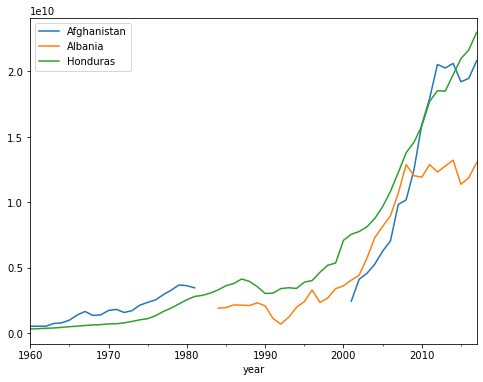

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# put the data set into long form instead of wide
df_melt = pd.melt(df, id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='year', value_name='GDP')

# convert year to a date time
df_melt['year'] = pd.to_datetime(df_melt['year'])

def plot_results(column_name):
    # plot the results for Afghanistan, Albania, and Honduras
    fig, ax = plt.subplots(figsize=(8,6))

    df_melt[(df_melt['Country Name'] == 'Afghanistan') | 
            (df_melt['Country Name'] == 'Albania') | 
            (df_melt['Country Name'] == 'Honduras')].groupby('Country Name').plot('year', column_name, legend=True, ax=ax)
    ax.legend(labels=['Afghanistan', 'Albania', 'Honduras'])
    
plot_results('GDP')

Afghanistan and Albania are missing data, which show up as gaps in the results. 


In [ ]:
df_melt['GDP_filled'] = df_melt.groupby('Country Name')['GDP'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
plot_results('GDP_filled')

This is somewhat of an improvement. At least there is no missing data; however, because GDP tends to increase over time, the mean GDP is probably not the best way to fill in missing values for this particular case. Next, try using forward fill to deal with any missing values.

In [ ]:
df_melt['GDP_ffill'] = df_melt.sort_values('year').groupby('Country Name')['GDP'].fillna(method='ffill')

In [ ]:
# plot the results
plot_results('GDP_ffill')

This looks better at least for the Afghanistan data; however, the Albania data is still missing values. You can fill in the Albania data using back fill. That is what you'll do next.

In [ ]:
df_melt['GDP_bfill'] = df_melt.sort_values('year').groupby('Country Name')['GDP'].fillna(method='bfill')

In [ ]:
plot_results('GDP_bfill')

In [ ]:
# Run forward fill and backward fill on the GDP data
df_melt['GDP_ff_bf'] = df_melt.sort_values('year').groupby('Country Name')['GDP'].fillna(method='ffill').fillna(method='bfill')

# Check if any GDP values are null
df_melt['GDP_ff_bf'].isnull().sum()

### Duplicate Data

In [ ]:
projects = pd.read_csv('projects_data.csv', dtype=str)
projects.drop('Unnamed: 56', axis=1, inplace=True)
projects['totalamt'] = pd.to_numeric(projects['totalamt'].str.replace(',', ''))
projects['countryname'] = projects['countryname'].str.split(';', expand=True)[0]
projects['boardapprovaldate'] = pd.to_datetime(projects['boardapprovaldate'])

# filter the data frame for projects over 1 billion dollars

# count the number of unique countries in the results

projects[projects['totalamt'] > 1000000000]['countryname'].nunique()

17

## Finding Outliers

In this, I'll practice looking for outliers. I'll look at the World Bank GDP and population data sets. First, you'll look at the data from a one-dimensional perspective and then a two-dimensional perspective.

Run the code below to import the data sets and prepare the data for analysis. The code:
* reads in the data sets
* reshapes the datasets to a long format
* uses back fill and forward fill to fill in missing values
* merges the gdp and population data together
* shows the first 10 values in the data set

In [ ]:
# read in the projects data set and do basic wrangling 
gdp = pd.read_csv('gdp_data.csv', skiprows=4)
gdp.drop(['Unnamed: 62', 'Country Code', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)
population = pd.read_csv('population_data.csv', skiprows=4)
population.drop(['Unnamed: 62', 'Country Code', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)


# Reshape the data sets so that they are in long format
gdp_melt = gdp.melt(id_vars=['Country Name'], 
                    var_name='year', 
                    value_name='gdp')

# Use back fill and forward fill to fill in missing gdp values
gdp_melt['gdp'] = gdp_melt.sort_values('year').groupby('Country Name')['gdp'].fillna(method='ffill').fillna(method='bfill')

population_melt = population.melt(id_vars=['Country Name'], 
                                  var_name='year', 
                                  value_name='population')

# Use back fill and forward fill to fill in missing population values
population_melt['population'] = population_melt.sort_values('year').groupby('Country Name')['population'].fillna(method='ffill').fillna(method='bfill')

# merge the population and gdp data together into one data frame
df_country = gdp_melt.merge(population_melt, on=('Country Name', 'year'))

# filter data for the year 2016
df_2016 = df_country[df_country['year'] == '2016']

# see what the data looks like
df_2016.head(10)

,Country Name,year,gdp,population
14784,Aruba,2016,2.584464e+09,104822.0
14785,Afghanistan,2016,1.946902e+10,34656032.0
14786,Angola,2016,9.533720e+10,28813463.0
14787,Albania,2016,1.188368e+10,2876101.0
14788,Andorra,2016,2.877312e+09,77281.0
14789,Arab World,2016,2.500164e+12,406452690.0
14790,United Arab Emirates,2016,3.570451e+11,9269612.0
14791,Argentina,2016,5.548609e+11,43847430.0
14792,Armenia,2016,1.054614e+10,2924816.0
14793,American Samoa,2016,6.580000e+08,55599.0


Explore the data set to identify outliers using the Tukey rule.

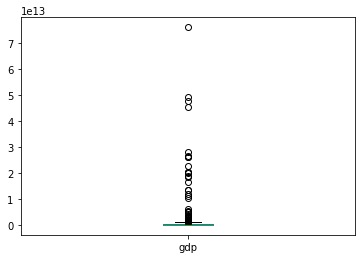

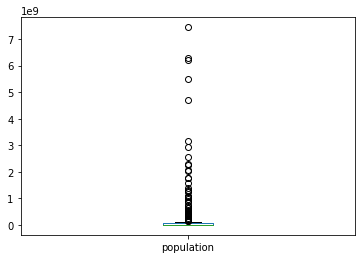

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 

# Make a boxplot of the population data for the year 2016
df_2016.plot('population',kind='box');

# Make a boxplot of the gdp data for the year 2016
df_2016.plot('gdp',kind='box');

Use the Tukey rule to determine what values of the population data are outliers for the year 2016. The Tukey rule finds outliers in one-dimension. The steps are:

* Find the first quartile (ie .25 quantile)
* Find the third quartile (ie .75 quantile)
* Calculate the inter-quartile range (Q3 - Q1)
* Any value that is greater than Q3 + 1.5 * IQR is an outlier
* Any value that is less than Qe - 1.5 * IQR is an outlier

In [ ]:
population_2016 = df_2016[['Country Name','population']]


Q1 = population_2016['population'].quantile(0.25)

Q3 = population_2016['population'].quantile(0.75)

IQR = Q3 - Q1

max_value = Q3 + 1.5 * IQR
min_value = Q1 - 1.5 * IQR

population_outliers = population_2016[(population_2016['population'] > max_value) | (population_2016['population'] < min_value)]
population_outliers

,Country Name,population
14789,Arab World,4.064527e+08
14802,Bangladesh,1.629516e+08
14811,Brazil,2.076529e+08
14822,China,1.378665e+09
14843,East Asia & Pacific (excluding high income),2.053299e+09
14844,Early-demographic dividend,3.170658e+09
14845,East Asia & Pacific,2.298727e+09
14846,Europe & Central Asia (excluding high income),4.132349e+08
14847,Europe & Central Asia,9.116863e+08
14850,Euro area,3.406174e+08


Clearly many of these outliers are due to regional data getting aggregated together. 

Remove these data points and redo the analysis. There's a list provided below of the 'Country Name' values that are not actually countries.

## Scaling Data

In this exercise, you'll practice scaling data. Sometimes, you'll see the terms **standardization** and **normalization** used interchangeably when referring to feature scaling. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# read in the projects data set and do basic wrangling 
gdp = pd.read_csv('gdp_data.csv', skiprows=4)
gdp.drop(['Unnamed: 62', 'Country Code', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)
population = pd.read_csv('population_data.csv', skiprows=4)
population.drop(['Unnamed: 62', 'Country Code', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)


# Reshape the data sets so that they are in long format
gdp_melt = gdp.melt(id_vars=['Country Name'], 
                    var_name='year', 
                    value_name='gdp')

# Use back fill and forward fill to fill in missing gdp values
gdp_melt['gdp'] = gdp_melt.sort_values('year').groupby('Country Name')['gdp'].fillna(method='ffill').fillna(method='bfill')

population_melt = population.melt(id_vars=['Country Name'], 
                                  var_name='year', 
                                  value_name='population')

# Use back fill and forward fill to fill in missing population values
population_melt['population'] = population_melt.sort_values('year').groupby('Country Name')['population'].fillna(method='ffill').fillna(method='bfill')

# merge the population and gdp data together into one data frame
df_country = gdp_melt.merge(population_melt, on=('Country Name', 'year'))

# filter data for the year 2016
df_2016 = df_country[df_country['year'] == '2016']

# filter out values that are not countries
non_countries = ['World',
 'High income',
 'OECD members',
 'Post-demographic dividend',
 'IDA & IBRD total',
 'Low & middle income',
 'Middle income',
 'IBRD only',
 'East Asia & Pacific',
 'Europe & Central Asia',
 'North America',
 'Upper middle income',
 'Late-demographic dividend',
 'European Union',
 'East Asia & Pacific (excluding high income)',
 'East Asia & Pacific (IDA & IBRD countries)',
 'Euro area',
 'Early-demographic dividend',
 'Lower middle income',
 'Latin America & Caribbean',
 'Latin America & the Caribbean (IDA & IBRD countries)',
 'Latin America & Caribbean (excluding high income)',
 'Europe & Central Asia (IDA & IBRD countries)',
 'Middle East & North Africa',
 'Europe & Central Asia (excluding high income)',
 'South Asia (IDA & IBRD)',
 'South Asia',
 'Arab World',
 'IDA total',
 'Sub-Saharan Africa',
 'Sub-Saharan Africa (IDA & IBRD countries)',
 'Sub-Saharan Africa (excluding high income)',
 'Middle East & North Africa (excluding high income)',
 'Middle East & North Africa (IDA & IBRD countries)',
 'Central Europe and the Baltics',
 'Pre-demographic dividend',
 'IDA only',
 'Least developed countries: UN classification',
 'IDA blend',
 'Fragile and conflict affected situations',
 'Heavily indebted poor countries (HIPC)',
 'Low income',
 'Small states',
 'Other small states',
 'Not classified',
 'Caribbean small states',
 'Pacific island small states']

# remove non countries from the data
df_2016 = df_2016[~df_2016['Country Name'].isin(non_countries)]


# show the first ten rows
print('first ten rows of data')
df_2016.head(10)

first ten rows of data


,Country Name,year,gdp,population
14784,Aruba,2016,2.584464e+09,104822.0
14785,Afghanistan,2016,1.946902e+10,34656032.0
14786,Angola,2016,9.533720e+10,28813463.0
14787,Albania,2016,1.188368e+10,2876101.0
14788,Andorra,2016,2.877312e+09,77281.0
14790,United Arab Emirates,2016,3.570451e+11,9269612.0
14791,Argentina,2016,5.548609e+11,43847430.0
14792,Armenia,2016,1.054614e+10,2924816.0
14793,American Samoa,2016,6.580000e+08,55599.0
14794,Antigua and Barbuda,2016,1.460145e+09,100963.0


Normalize the Data

To normalize data, you take a feature, like gdp, and use the following formula

$x_{normalized} = \frac{x - x_{min}}{x_{max} - x_{min}}$

where 
* x is a value of gdp
* x_max is the maximum gdp in the data
* x_min is the minimum GDP in the data

First, write a function that outputs the x_min and x_max values of an array. The inputs are an array of data (like the GDP data). The outputs are the x_min and x_max values

In [ ]:
def x_min_max(data):
    minimum = min(data)
    maximum = max(data)
    return minimum, maximum

x_min_max(df_2016['gdp'])

(36572611.8853148, 18624475000000.0)

Next, write a function that normalizes a data point. The inputs are an x value, a minimum value, and a maximum value. The output is the normalized data point

In [ ]:
def normalize(x, x_min, x_max):
    return (x - x_min) / (x_max - x_min)

## Feature Engineering

Practice creating new features from the GDP and population data. 

You'll create a new feature gdppercapita, which is GDP divided by population. You'll then write code to create new features like GDP squared and GDP cubed. 

Start by running the code below. It reads in the World Bank data, filters the data for the year 2016, and cleans the data.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# read in the projects data set and do basic wrangling 
gdp = pd.read_csv('gdp_data.csv', skiprows=4)
gdp.drop(['Unnamed: 62', 'Country Code', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)
population = pd.read_csv('population_data.csv', skiprows=4)
population.drop(['Unnamed: 62', 'Country Code', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)


# Reshape the data sets so that they are in long format
gdp_melt = gdp.melt(id_vars=['Country Name'], 
                    var_name='year', 
                    value_name='gdp')

# Use back fill and forward fill to fill in missing gdp values
gdp_melt['gdp'] = gdp_melt.sort_values('year').groupby('Country Name')['gdp'].fillna(method='ffill').fillna(method='bfill')

population_melt = population.melt(id_vars=['Country Name'], 
                                  var_name='year', 
                                  value_name='population')

# Use back fill and forward fill to fill in missing population values
population_melt['population'] = population_melt.sort_values('year').groupby('Country Name')['population'].fillna(method='ffill').fillna(method='bfill')

# merge the population and gdp data together into one data frame
df_country = gdp_melt.merge(population_melt, on=('Country Name', 'year'))

# filter data for the year 2016
df_2016 = df_country[df_country['year'] == '2016']

# filter out values that are not countries
non_countries = ['World',
 'High income',
 'OECD members',
 'Post-demographic dividend',
 'IDA & IBRD total',
 'Low & middle income',
 'Middle income',
 'IBRD only',
 'East Asia & Pacific',
 'Europe & Central Asia',
 'North America',
 'Upper middle income',
 'Late-demographic dividend',
 'European Union',
 'East Asia & Pacific (excluding high income)',
 'East Asia & Pacific (IDA & IBRD countries)',
 'Euro area',
 'Early-demographic dividend',
 'Lower middle income',
 'Latin America & Caribbean',
 'Latin America & the Caribbean (IDA & IBRD countries)',
 'Latin America & Caribbean (excluding high income)',
 'Europe & Central Asia (IDA & IBRD countries)',
 'Middle East & North Africa',
 'Europe & Central Asia (excluding high income)',
 'South Asia (IDA & IBRD)',
 'South Asia',
 'Arab World',
 'IDA total',
 'Sub-Saharan Africa',
 'Sub-Saharan Africa (IDA & IBRD countries)',
 'Sub-Saharan Africa (excluding high income)',
 'Middle East & North Africa (excluding high income)',
 'Middle East & North Africa (IDA & IBRD countries)',
 'Central Europe and the Baltics',
 'Pre-demographic dividend',
 'IDA only',
 'Least developed countries: UN classification',
 'IDA blend',
 'Fragile and conflict affected situations',
 'Heavily indebted poor countries (HIPC)',
 'Low income',
 'Small states',
 'Other small states',
 'Not classified',
 'Caribbean small states',
 'Pacific island small states']

# remove non countries from the data
df_2016 = df_2016[~df_2016['Country Name'].isin(non_countries)]
df_2016.reset_index(inplace=True, drop=True)

Create a new feature called gdppercapita in a new column. This feature should be the gdp value divided by the population.

In [ ]:
df_2016['gdppercapita'] = df_2016['gdp'] / df_2016['population']

# Load 

In this part, I'll load data into different formats: a csv file, a json file, and a SQLite database.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# read in the projects data set and do basic wrangling 
gdp = pd.read_csv('gdp_data.csv', skiprows=4)
gdp.drop(['Unnamed: 62', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)
population = pd.read_csv('population_data.csv', skiprows=4)
population.drop(['Unnamed: 62', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)


# Reshape the data sets so that they are in long format
gdp_melt = gdp.melt(id_vars=['Country Name', 'Country Code'], 
                    var_name='year', 
                    value_name='gdp')

# Use back fill and forward fill to fill in missing gdp values
gdp_melt['gdp'] = gdp_melt.sort_values('year').groupby(['Country Name', 'Country Code'])['gdp'].fillna(method='ffill').fillna(method='bfill')

population_melt = population.melt(id_vars=['Country Name', 'Country Code'], 
                                  var_name='year', 
                                  value_name='population')

# Use back fill and forward fill to fill in missing population values
population_melt['population'] = population_melt.sort_values('year').groupby('Country Name')['population'].fillna(method='ffill').fillna(method='bfill')

# merge the population and gdp data together into one data frame
df_indicator = gdp_melt.merge(population_melt, on=('Country Name', 'Country Code', 'year'))

# filter out values that are not countries
non_countries = ['World',
 'High income',
 'OECD members',
 'Post-demographic dividend',
 'IDA & IBRD total',
 'Low & middle income',
 'Middle income',
 'IBRD only',
 'East Asia & Pacific',
 'Europe & Central Asia',
 'North America',
 'Upper middle income',
 'Late-demographic dividend',
 'European Union',
 'East Asia & Pacific (excluding high income)',
 'East Asia & Pacific (IDA & IBRD countries)',
 'Euro area',
 'Early-demographic dividend',
 'Lower middle income',
 'Latin America & Caribbean',
 'Latin America & the Caribbean (IDA & IBRD countries)',
 'Latin America & Caribbean (excluding high income)',
 'Europe & Central Asia (IDA & IBRD countries)',
 'Middle East & North Africa',
 'Europe & Central Asia (excluding high income)',
 'South Asia (IDA & IBRD)',
 'South Asia',
 'Arab World',
 'IDA total',
 'Sub-Saharan Africa',
 'Sub-Saharan Africa (IDA & IBRD countries)',
 'Sub-Saharan Africa (excluding high income)',
 'Middle East & North Africa (excluding high income)',
 'Middle East & North Africa (IDA & IBRD countries)',
 'Central Europe and the Baltics',
 'Pre-demographic dividend',
 'IDA only',
 'Least developed countries: UN classification',
 'IDA blend',
 'Fragile and conflict affected situations',
 'Heavily indebted poor countries (HIPC)',
 'Low income',
 'Small states',
 'Other small states',
 'Not classified',
 'Caribbean small states',
 'Pacific island small states']

# remove non countries from the data
df_indicator  = df_indicator[~df_indicator['Country Name'].isin(non_countries)]
df_indicator.reset_index(inplace=True, drop=True)

df_indicator.columns = ['countryname', 'countrycode', 'year', 'gdp', 'population']

# output the first few rows of the data frame
df_indicator.head()

,countryname,countrycode,year,gdp,population
0,Aruba,ABW,1960,1.916242e+09,54211.0
1,Afghanistan,AFG,1960,5.377778e+08,8996351.0
2,Angola,AGO,1960,1.857319e+10,5643182.0
3,Albania,ALB,1960,1.857319e+10,1608800.0
4,Andorra,AND,1960,1.857319e+10,13411.0


Run this code cell to read in the countries data set. This will create a data frame called df_projects containing the World Bank projects data. The data frame only has the 'id', 'countryname', 'countrycode', 'totalamt', and 'year' columns.

In [ ]:
!pip install pycountry
from pycountry import countries

# read in the projects data set with all columns type string
df_projects = pd.read_csv('projects_data.csv', dtype=str)
df_projects.drop(['Unnamed: 56'], axis=1, inplace=True)

df_projects['countryname'] = df_projects['countryname'].str.split(';').str.get(0)

# set up the libraries and variables
from collections import defaultdict
country_not_found = [] # stores countries not found in the pycountry library
project_country_abbrev_dict = defaultdict(str) # set up an empty dictionary of string values

# iterate through the country names in df_projects. 
# Create a dictionary mapping the country name to the alpha_3 ISO code
for country in df_projects['countryname'].drop_duplicates().sort_values():
    try: 
        # look up the country name in the pycountry library
        # store the country name as the dictionary key and the ISO-3 code as the value
        project_country_abbrev_dict[country] = countries.lookup(country).alpha_3
    except:
        # If the country name is not in the pycountry library, then print out the country name
        # And store the results in the country_not_found list
        country_not_found.append(country)
        
# run this code cell to load the dictionary

country_not_found_mapping = {'Co-operative Republic of Guyana': 'GUY',
             'Commonwealth of Australia':'AUS',
             'Democratic Republic of Sao Tome and Prin':'STP',
             'Democratic Republic of the Congo':'COD',
             'Democratic Socialist Republic of Sri Lan':'LKA',
             'East Asia and Pacific':'EAS',
             'Europe and Central Asia': 'ECS',
             'Islamic  Republic of Afghanistan':'AFG',
             'Latin America':'LCN',
              'Caribbean':'LCN',
             'Macedonia':'MKD',
             'Middle East and North Africa':'MEA',
             'Oriental Republic of Uruguay':'URY',
             'Republic of Congo':'COG',
             "Republic of Cote d'Ivoire":'CIV',
             'Republic of Korea':'KOR',
             'Republic of Niger':'NER',
             'Republic of Kosovo':'XKX',
             'Republic of Rwanda':'RWA',
              'Republic of The Gambia':'GMB',
              'Republic of Togo':'TGO',
              'Republic of the Union of Myanmar':'MMR',
              'Republica Bolivariana de Venezuela':'VEN',
              'Sint Maarten':'SXM',
              "Socialist People's Libyan Arab Jamahiriy":'LBY',
              'Socialist Republic of Vietnam':'VNM',
              'Somali Democratic Republic':'SOM',
              'South Asia':'SAS',
              'St. Kitts and Nevis':'KNA',
              'St. Lucia':'LCA',
              'St. Vincent and the Grenadines':'VCT',
              'State of Eritrea':'ERI',
              'The Independent State of Papua New Guine':'PNG',
              'West Bank and Gaza':'PSE',
              'World':'WLD'}

project_country_abbrev_dict.update(country_not_found_mapping)

df_projects['countrycode'] = df_projects['countryname'].apply(lambda x: project_country_abbrev_dict[x])

df_projects['boardapprovaldate'] = pd.to_datetime(df_projects['boardapprovaldate'])

df_projects['year'] = df_projects['boardapprovaldate'].dt.year.astype(str).str.slice(stop=4)

df_projects['totalamt'] = pd.to_numeric(df_projects['totalamt'].str.replace(',',""))

df_projects = df_projects[['id', 'countryname', 'countrycode', 'totalamt', 'year']]

df_projects.head()

     |████████████████████████████████| 10.1 MB 7.6 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=5a20e606cd10a94f77031f7c3973db74ea3770a6b28bf9545537c321c8c42e0d
  Stored in directory: /Users/orperets/Library/Caches/pip/wheels/e2/aa/0f/c224e473b464387170b83ca7c66947b4a7e33e8d903a679748
Successfully built pycountry


,id,countryname,countrycode,totalamt,year
0,P162228,World,WLD,0,2018
1,P163962,Democratic Republic of the Congo,COD,200000000,2018
2,P167672,People's Republic of Bangladesh,BGD,58330000,2018
3,P158768,Islamic Republic of Afghanistan,AFG,20000000,2018
4,P161364,Federal Republic of Nigeria,NGA,100000000,2018


The first few cells in this workbook loaded and cleaned the World Bank Data. You now have two data frames:
* df_projects, which contain data from the projects data set
* df_indicator, which contain population and gdp data for various years

They both have country code variables. Note, however, that there could be countries represented in the projects data set that are not in the indicator data set and vice versus.

In this first exercise, merge the two data sets together using country code and year as common keys. When joining the data sets, keep all of the data in the df_projects dataframe even if there is no indicator data for that country code.

In [ ]:
df_merged = df_projects.merge(df_indicator, how='left', on=['countrycode', 'year'])

In [ ]:
df_merged[(df_merged['year'] == '2017') & (df_merged['countryname_y'] == 'Jordan')]

,id,countryname_x,countrycode,totalamt,year,countryname_y,gdp,population
256,P161982,Hashemite Kingdom of Jordan,JOR,0,2017,Jordan,4.006831e+10,9702353.0
301,P162407,Hashemite Kingdom of Jordan,JOR,147700000,2017,Jordan,4.006831e+10,9702353.0
318,P160103,Hashemite Kingdom of Jordan,JOR,0,2017,Jordan,4.006831e+10,9702353.0
464,P161905,Hashemite Kingdom of Jordan,JOR,50000000,2017,Jordan,4.006831e+10,9702353.0
495,P163387,Hashemite Kingdom of Jordan,JOR,36100000,2017,Jordan,4.006831e+10,9702353.0
515,P163241,Hashemite Kingdom of Jordan,JOR,0,2017,Jordan,4.006831e+10,9702353.0


Output the df_merged dataframe as a json file. You can use the pandas [to_json() method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_json.html).

In [ ]:
df_merged.to_json('countrydata.json', orient='records')

Output the df_merged dataframe as a csv file. You can use the pandas [to_csv() method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html).

In [ ]:
df_merged.to_csv('countrydata.csv', index=False)

Output the df_merged dataframe as a sqlite database file. For this exercise, you can put all of the data as one table. In the next exercise, you'll create a database with multiple tables. 

In [ ]:
import sqlite3

# connect to the database
# the database file will be worldbank.db
# note that sqlite3 will create this database file if it does not exist already
conn = sqlite3.connect('worldbank.db')

df_merged.to_sql('merged', con = conn, if_exists='replace', index=False)

In [ ]:
pd.read_sql('SELECT * FROM merged WHERE year = "2017" AND countrycode = "BRA"', con = conn).head()

,id,countryname_x,countrycode,totalamt,year,countryname_y,gdp,population
0,P162033,Federative Republic of Brazil,BRA,125000000,2017,Brazil,2.055506e+12,209288278.0
1,P158000,Federative Republic of Brazil,BRA,0,2017,Brazil,2.055506e+12,209288278.0
2,P163868,Federative Republic of Brazil,BRA,250000000,2017,Brazil,2.055506e+12,209288278.0
3,P152285,Federative Republic of Brazil,BRA,0,2017,Brazil,2.055506e+12,209288278.0
4,P147158,Federative Republic of Brazil,BRA,50000000,2017,Brazil,2.055506e+12,209288278.0


Output the data to a SQL database like in the previous exercise; however, this time, put the df_indicator data in one table and the df_projects data in another table. Call the df_indicator table 'indicator' and the df_projects table 'projects'.

In [ ]:
import sqlite3

# connect to the database
# the database file will be worldbank.db
# note that sqlite3 will create this database file if it does not exist already
conn = sqlite3.connect('worldbank.db')

df_indicator.to_sql('indicator', con = conn, if_exists='replace', index=False)
df_projects.to_sql('projects', con = conn, if_exists='replace', index=False)

In [ ]:
pd.read_sql('SELECT * FROM projects LEFT JOIN indicator ON \
projects.countrycode = indicator.countrycode AND \
projects.year = indicator.year WHERE \
projects.year = "2017" AND projects.countrycode = "BRA"', con = conn).head()

,id,countryname,countrycode,totalamt,year,countryname,countrycode,year,gdp,population
0,P162033,Federative Republic of Brazil,BRA,125000000,2017,Brazil,BRA,2017,2.055506e+12,209288278.0
1,P158000,Federative Republic of Brazil,BRA,0,2017,Brazil,BRA,2017,2.055506e+12,209288278.0
2,P163868,Federative Republic of Brazil,BRA,250000000,2017,Brazil,BRA,2017,2.055506e+12,209288278.0
3,P152285,Federative Republic of Brazil,BRA,0,2017,Brazil,BRA,2017,2.055506e+12,209288278.0
4,P147158,Federative Republic of Brazil,BRA,50000000,2017,Brazil,BRA,2017,2.055506e+12,209288278.0


In [ ]:
# commit any changes to the database and close the database
conn.commit()
conn.close()